Each stage of the CRISP-DM process will be looked at in this notebook. These stages are:
1. Business Understanding
2. Data Understanding
3. Prepare Data
4. Data Modeling
5. Evaluate the Results

# 1. Business Understanding
In this notebook, I will be exploring the 2017 Stack Overflow results in order to glean some information on professional developers and what to focus on to have the best career.

There will be three questions I will seek to answer in order to get this information:
1. What are the most common languages, technologies, methodologies and technologies used by professionals
2. What is the average salary for each programming language
3. Which programming language has the highest job satisfaction

# 2. Data Understanding
In order to gain some understanding of the data I loaded it into a dataframe and ran df.head().
This gave me 5 example entries of each column. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', None)

df = pd.read_csv('./survey_results_public.csv')
schema = pd.read_csv('./survey_results_schema.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

## Question 1: What are the most common languages, technologies, methodologies and tools used by professionals

# 3. Prepare Data
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers. This was the only way in which I needed to handle Nan values and categorical values.

In [2]:
q1 = df[['Professional', 'HaveWorkedLanguage', 'HaveWorkedFramework', 'HaveWorkedDatabase', 'Methodology']]

q1 = q1[q1.Professional == "Professional developer"]
q1.head()

,Professional,HaveWorkedLanguage,HaveWorkedFramework,HaveWorkedDatabase,Methodology
2,Professional developer,Java; PHP; Python,NaN,MySQL,Agile; Lean; Scrum; Extreme; Pair; Kanban
4,Professional developer,NaN,NaN,NaN,NaN
7,Professional developer,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,React,Redis; MySQL; PostgreSQL,Agile; Pair; Kanban
8,Professional developer,C#; JavaScript,AngularJS; Node.js; .NET Core,SQL Server,Agile; Scrum; Pair; Kanban; Domain-driven design
9,Professional developer,Objective-C; Swift,NaN,PostgreSQL,Agile; Scrum; Pair; Kanban


# 4. Data Modelling

### The most commonly used languages are displayed here

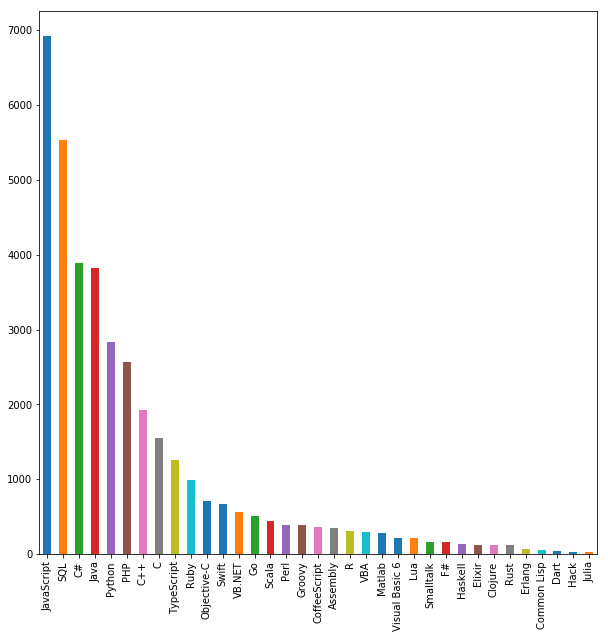

In [3]:
languages = q1['HaveWorkedLanguage'].str.split('; ', expand=True).stack().value_counts()

plt.figure(figsize=(10,10))
languages.plot(kind="bar")

plt.savefig('languages')

### The most commonly used frameworks are displayed here

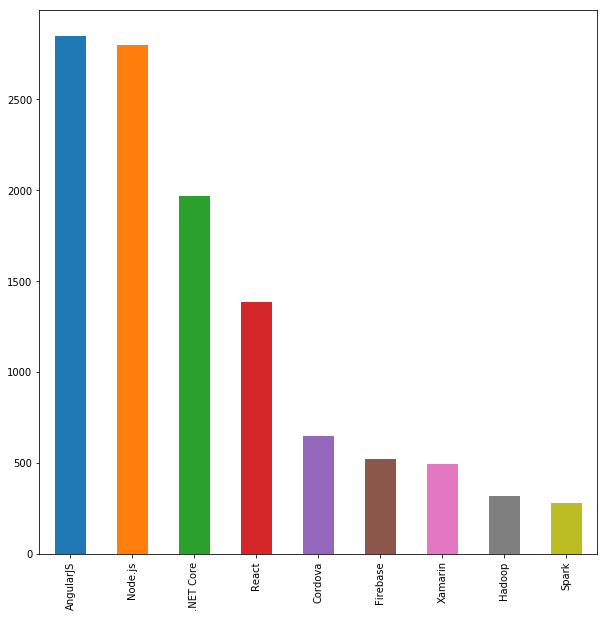

In [4]:
frameworks = q1['HaveWorkedFramework'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
frameworks.plot(kind="bar")
plt.savefig('frameworks')

### The most commonly used databases are displayed here

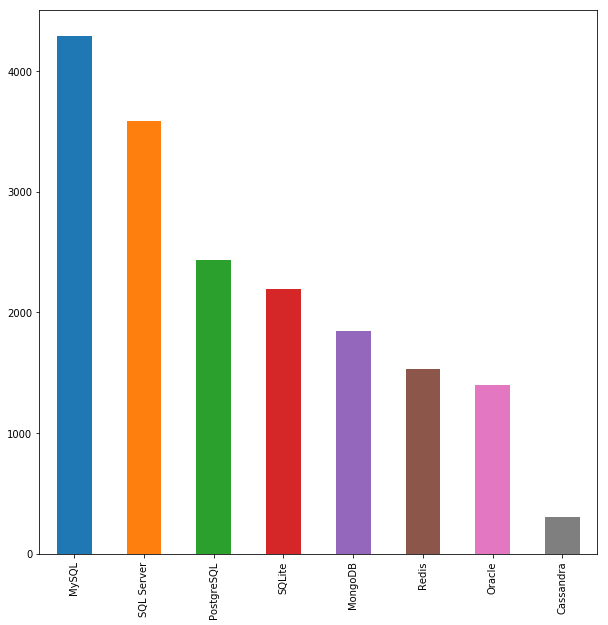

In [5]:
databases = q1['HaveWorkedDatabase'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
databases.plot(kind="bar")
plt.savefig('databses')

### The most commonly used methodologies are displayed here

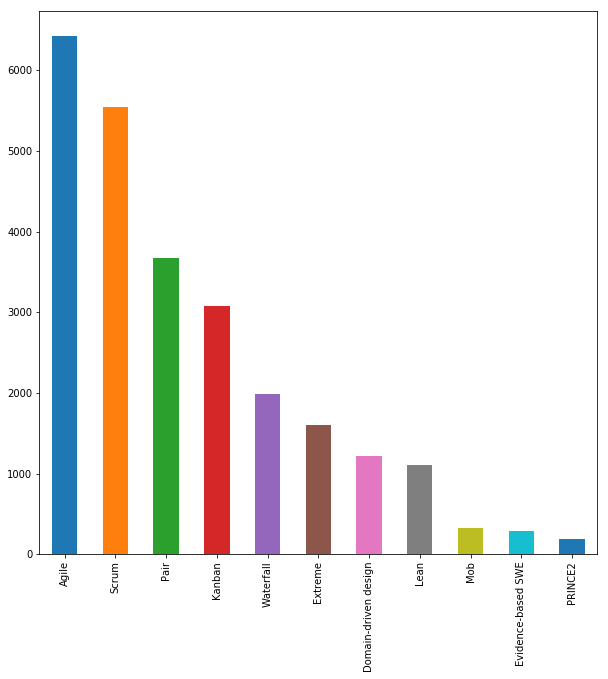

In [6]:
methodologies = q1['Methodology'].str.split('; ', expand=True).stack().value_counts()
plt.figure(figsize=(10,10))
methodologies.plot(kind="bar")
plt.savefig('methodologies')

# 5. Evaluate the Results

JavaScript, C#, Java, SQL and Python are the most used languages by professional developers and therefore would be the most in demand and transferable skill between jobs. To support this, the most used frameworks are mostly JavaScript based. Agile is also the most popular methodology used by professional developers.

## Question 2:  What is the average salary for each programming language

# 3. Prepare Data
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey

All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.If the row had Salary or HaveWorkedLanguage as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist.  This was the only way in which I needed to handle Nan values and categorical values.

In [7]:
q2 = df[['Professional', 'HaveWorkedLanguage', 'Salary']]

q2 = q2[q2.Professional == "Professional developer"]
q2 = q2.drop('Professional', 1)
q2 = q2.dropna(subset=['Salary', 'HaveWorkedLanguage'], axis=0)
q2.head()

,HaveWorkedLanguage,Salary
2,Java; PHP; Python,113750.0
14,Assembly; C; C++,100000.0
17,C; Clojure; JavaScript; Matlab; Rust; SQL; Swift,130000.0
22,Java,100764.0
25,Java; Scala,175000.0


# 4. Data Modelling

In [8]:
def split_column(column_to_split, delimeter, column_to_store, df):
    """
    Method to split a columns values by a provided delimeter while
    retaining the associated value of another column.
    
    :param str column_to_split: column whose values are to be split
    :param str delimeter: delimeter to split by
    :param str columns_to_store: column who's data must be stored along split rows
    :param DataFrame df: dataframe to use
    """
    split_col = pd.DataFrame(columns = [column_to_split, column_to_store])
    for index, row in df.iterrows():
        columns = row[column_to_split].split(delimeter)
        for c in columns:
            split_col.loc[len(split_col)] = [c, row[column_to_store]]
    return split_col

In [9]:
split_languages = split_column("HaveWorkedLanguage", "; ", "Salary", q2)
split_languages.head()

,HaveWorkedLanguage,Salary
0,Java,113750.0
1,PHP,113750.0
2,Python,113750.0
3,Assembly,100000.0
4,C,100000.0


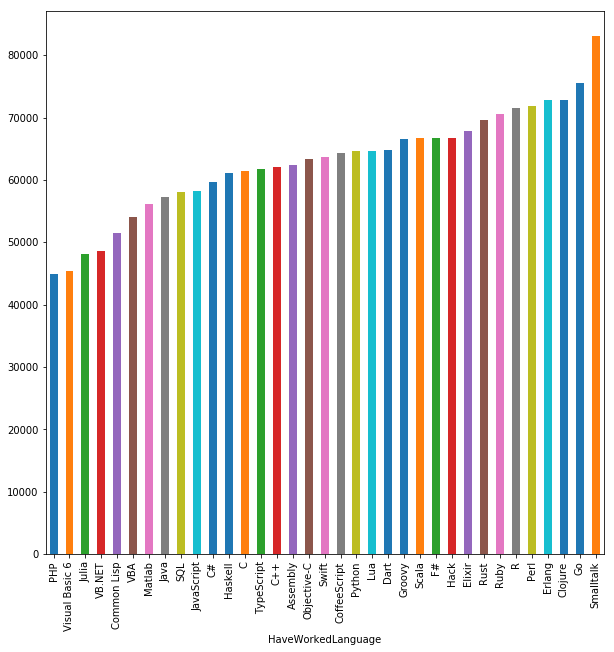

In [10]:
q2_answer = split_languages.groupby(['HaveWorkedLanguage']).mean()['Salary'].sort_values()
plt.figure(figsize=(10,10))
q2_answer.plot(kind = 'bar')
plt.savefig('q2')

# 5. Evaluate the Results
As we can see from this bar chart, the average salaries for each language range from mid 40,000 to over 80,000. What’s interesting is that the most popular languages that we found in the last section are of a lower salary expectation and the least popular languages have higher average salaries. This makes sense as if less people know how to use a language, that skill warrants a higher salary.

## Question 3: Which programming language has the highest job satisfaction

# 3. Prepare Data
The data will be prepared here by selecting the desired columns and only using the rows where a professional devloper was taking the survey
All rows were dropped where the Professional column did not equal "Professional Developer" as I was only interested in Professional Developers.If the row had JobSatisfaction or HaveWorkedLanguage as Nan then the row would be dropped. This is becase I was trying to find a correlation between the two and therefore they needed to exist. This was the only way in which I needed to handle Nan values and categorical values.

In [11]:
q3 = df[['Professional', 'HaveWorkedLanguage', 'JobSatisfaction']]

q3 = q3[q3.Professional == "Professional developer"]
q3 = q3.drop('Professional', 1)
q3 = q3.dropna(subset=['JobSatisfaction', 'HaveWorkedLanguage'], axis=0)
q3.head()

,HaveWorkedLanguage,JobSatisfaction
2,Java; PHP; Python,9.0
7,CoffeeScript; Clojure; Elixir; Erlang; Haskell...,7.0
8,C#; JavaScript,6.0
9,Objective-C; Swift,8.0
13,Java; JavaScript; Ruby; SQL,6.0


# 4. Data Modelling

In [12]:
split_languages_q3 = split_column("HaveWorkedLanguage", "; ", "JobSatisfaction", q3)

In [13]:
q3_answer = split_languages_q3.groupby(['HaveWorkedLanguage']).mean()['JobSatisfaction'].sort_values()
q3_answer.head(50)

HaveWorkedLanguage
Visual Basic 6    6.877934
VB.NET            6.975970
VBA               7.000000
Perl              7.045333
Java              7.050697
SQL               7.056984
PHP               7.061347
C#                7.061877
Clojure           7.076923
JavaScript        7.096789
C                 7.111556
Groovy            7.122396
Rust              7.123894
Ruby              7.132231
C++               7.139710
R                 7.153584
Python            7.197758
Haskell           7.209302
Swift             7.228659
Matlab            7.262774
Lua               7.266667
F#                7.278481
TypeScript        7.284790
Common Lisp       7.285714
Go                7.303462
CoffeeScript      7.310249
Scala             7.320276
Assembly          7.350148
Elixir            7.358333
Julia             7.391304
Objective-C       7.403983
Dart              7.424242
Erlang            7.432432
Smalltalk         7.493750
Hack              7.666667
Name: JobSatisfaction, dtype: float6

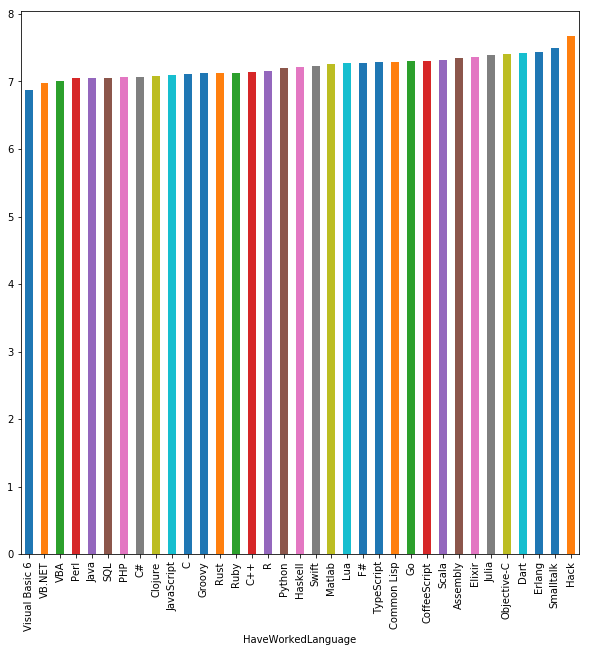

In [15]:
plt.figure(figsize=(10,10))
q3_answer.plot(kind = 'bar')
plt.savefig('q3')

# 5. Evaluate the Results
There is a similar curve here to correlation between languages and salaries. While this could mean that those with more specialised skill sets feel that they are more valuable and therefore are more satisfied with their jobs, it could simply be that those who are paid more are more satisfied.